In [1]:
#Importing Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.models import Sequential
from keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Dense,Dropout,Flatten,LocallyConnected2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2
from keras.utils import plot_model,to_categorical
import pandas as pd

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [3]:
emotions = {0:'Anger', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [4]:
def plot_images(images,label=1):  
    plt.imshow(np.reshape(images,(48,48)))
    plt.show()
    if label is not 1 :
        print("Emotion Detected: "+emotions[label.argmax()])



# emotions = [      0   ,        1      ,      2   ,      3     ,      4   ,         5     ,        6      ]
# emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ----------Extra dataset concat---------------------

In [5]:
import cv2

In [6]:
import os

In [7]:
xx_new=[]
y=[]
ytmp=[0,0,0,0,0,0,0]

In [8]:
i=0
for image in os.listdir("KDEF_VGG_DATA"):
    name=image[-5:]
    ytmp[int(name[0])]=1
    y.append(ytmp)
    a=cv2.imread(os.getcwd()+"\\KDEF_VGG_DATA\\"+image,cv2.IMREAD_GRAYSCALE)
    
    a=a/255
    b=cv2.resize(a,(48,48))
    b=np.reshape(b,(48,48,1))
    
    xx_new.append(b)
    #plt.imshow(xx_new[])
    #plt.show()
    i=i+1
    ytmp=[0,0,0,0,0,0,0]
y=np.array(y,np.float32)  
xx_new=np.array(xx_new,np.float32)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,ytrain_lab,ytest_lab=train_test_split(xx_new,y,test_size=0.1)

In [11]:
x_train[3900].shape


(48, 48, 1)

**--------------------------------------------------------------------**

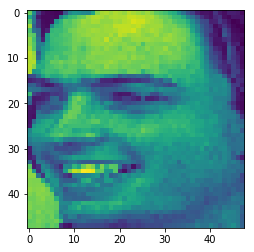

Emotion Detected: Happy


In [12]:
#-----------------------------------------Plotting Images-----------------------------------------


plot_images(x_train[3900],ytrain_lab[3900])
#plot_images(np.reshape(img1,-1),train_lab[0])

# Building Network

**Run this cell if you dont have model.h5 file**

In [13]:
#------------------------------------------Trainning FER dataset------------------------------------------------
model=Sequential()

model.add(Conv2D(36,3,padding='same',activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(36, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(LocallyConnected2D(100, 3, padding='valid', activation='relu'))
model.add(LocallyConnected2D(100, 3, padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [15]:
import time

start = time.time()
batchSize = 500
trainingEpochs = 70

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

trainingHistory = model.fit(x_train, ytrain_lab, batch_size=batchSize, 
                            epochs=trainingEpochs,
                            validation_split=0.3, 
                            #callbacks=[early_stopping], 
                            shuffle=True,)

trainingAccuracy = trainingHistory.history['acc']
validationAccuracy = trainingHistory.history['val_acc']

end = time.time()
print("*Net Time : ", (end-start)/60, ' mins...')

Train on 3079 samples, validate on 1320 samples
Epoch 1/70
3079/3079 [==============================] - 4s 1ms/step - loss: 1.9460 - acc: 0.1475 - val_loss: 1.9478 - val_acc: 0.1311
Epoch 2/70
3079/3079 [==============================] - 2s 785us/step - loss: 1.9457 - acc: 0.1478 - val_loss: 1.9474 - val_acc: 0.1356
Epoch 3/70
3079/3079 [==============================] - 2s 785us/step - loss: 1.9445 - acc: 0.1546 - val_loss: 1.9465 - val_acc: 0.1417
Epoch 4/70
3079/3079 [==============================] - 2s 787us/step - loss: 1.9427 - acc: 0.1549 - val_loss: 1.9469 - val_acc: 0.1508
Epoch 5/70
3079/3079 [==============================] - 2s 787us/step - loss: 1.9395 - acc: 0.1582 - val_loss: 1.9445 - val_acc: 0.1598
Epoch 6/70
3079/3079 [==============================] - 2s 788us/step - loss: 1.9357 - acc: 0.1747 - val_loss: 1.9432 - val_acc: 0.1803
Epoch 7/70
3079/3079 [==============================] - 2s 789us/step - loss: 1.9309 - acc: 0.1897 - val_loss: 1.9311 - val_acc: 0.2136
Ep

3079/3079 [==============================] - 2s 795us/step - loss: 0.4583 - acc: 0.8272 - val_loss: 0.8244 - val_acc: 0.7341
Epoch 61/70
3079/3079 [==============================] - 2s 795us/step - loss: 0.4206 - acc: 0.8428 - val_loss: 0.8027 - val_acc: 0.7409
Epoch 62/70
3079/3079 [==============================] - 2s 795us/step - loss: 0.4223 - acc: 0.8409 - val_loss: 0.8322 - val_acc: 0.7273
Epoch 63/70
3079/3079 [==============================] - 2s 793us/step - loss: 0.4247 - acc: 0.8366 - val_loss: 0.7517 - val_acc: 0.7439
Epoch 64/70
3079/3079 [==============================] - 2s 794us/step - loss: 0.3804 - acc: 0.8613 - val_loss: 0.8191 - val_acc: 0.7515
Epoch 65/70
3079/3079 [==============================] - 2s 794us/step - loss: 0.3915 - acc: 0.8509 - val_loss: 0.7532 - val_acc: 0.7553
Epoch 66/70
3079/3079 [==============================] - 2s 794us/step - loss: 0.3644 - acc: 0.8633 - val_loss: 0.7962 - val_acc: 0.7455
Epoch 67/70
3079/3079 [==============================

**Model Accuracy::--**

In [16]:

scores = model.evaluate(x_test, ytest_lab)
print('%s: %.2f%%'% ("Accuracy", scores[1]*100))

489/489 [==============================] - 0s 532us/step
Accuracy: 75.66%


**Saving Model:-**

In [17]:
model.save("model.h5")
model.save_weights("model_weights.h5")

# Loading Saved Model

In [5]:
from keras.models import load_model

In [6]:
def creat_mod():
    model=Sequential()

    model.add(Conv2D(36,3,padding='same',activation='relu',input_shape=(48,48,1)))
    model.add(Conv2D(36, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(LocallyConnected2D(100, 3, padding='valid', activation='relu'))
    model.add(LocallyConnected2D(100, 3, padding='valid', activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [7]:
mod=creat_mod()
mod.load_weights("model_weights.h5")
#model1=load_model("model.h5")
model1=mod

In [8]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

**Predicting from test dataset**

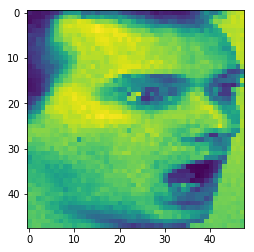

In [49]:
idx=400
prediction=model1.predict_proba(x_test[idx].reshape(1,48,48,1))
plot_images(x_test[idx],1)

In [50]:
print(prediction)
emotions[prediction[0].argmax()]

[[2.2541262e-09 2.6001125e-08 4.9670968e-02 6.7193048e-07 1.1577384e-05
  9.5031613e-01 5.9601263e-07]]


'Surprise'

**Plotting the results**

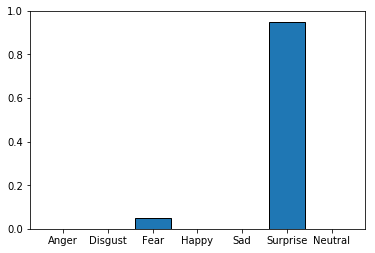

In [51]:
emt=[prediction[0][0],prediction[0][1],prediction[0][2],prediction[0][3],prediction[0][4],prediction[0][5],prediction[0][6]]

indx=np.arange(len(emotion))
plt.bar(indx,emt,edgecolor='black',alpha=1)
plt.xticks(indx,emotion)
plt.show()

In [52]:
import cv2

**Classifier to detect faces**

In [9]:
import cv2
modelFile = "opencv_face_detector_uint8.pb"
configFile = "opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [10]:


            
def detect(image):

    gray=image


    blob = cv2.dnn.blobFromImage(gray, 1.0, (300, 300), [104, 117, 123], False, False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    frameWidth=image.shape[1]
    frameHeight=image.shape[0]
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.6:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),2)
            try:
                image1 = gray[y1:(y2), x1:(x2)]

                img = cv2.resize(image1, (48,48), interpolation = cv2.INTER_CUBIC) / 255.

                prediction=model1.predict_proba(img.reshape(1,48,48,1))



                plot_images(img,1)
                plt.show()
                print("Emotion Detected: - "+emotions[prediction[0].argmax()])
                emt=[prediction[0][0],prediction[0][1],prediction[0][2],prediction[0][3],prediction[0][4],prediction[0][5],prediction[0][6]]
                indx=np.arange(len(emotion))
                plt.bar(indx,emt)
                plt.xticks(indx,emotion)
                plt.show()
            except:
                print("----->Problem during resize .Probably Cant detect any face")

# Test Your image here
**Save the image file in same directory with filename:- testimage.jpg**

In [11]:
image=cv2.imread("t5.jpg")
image.shape

(762, 562, 3)

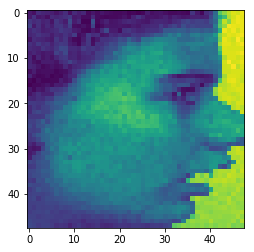

Emotion Detected: - Fear


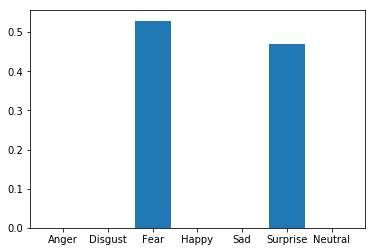

In [12]:
detect(image)

In [16]:
def detect_video(image):

    gray=image


    blob = cv2.dnn.blobFromImage(gray, 1.0, (300, 300), [104, 117, 123], False, False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    frameWidth=image.shape[1]
    frameHeight=image.shape[0]
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.6:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),2)
            try:
                image1 = gray[y1:(y2), x1:(x2)]

                img = cv2.resize(image1, (48,48), interpolation = cv2.INTER_CUBIC) / 255.

                prediction=model1.predict_proba(img.reshape(1,48,48,1))

                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(image,str(emotions[prediction[0].argmax()]),(x1,y1+10), font, 1,(255,255,255),2,cv2.LINE_AA)

                result=prediction
                if result is not None:
                    if result[0][6] < 0.6:
                        result[0][6] = result[0][6] - 0.12
                        result[0][:3] += 0.01
                        result[0][4:5] += 0.04
        # write the different emotions and have a bar to indicate probabilities for each class
                    for index, emot in enumerate(emotion):
                        cv2.putText(image, emot, (10, index * 20 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
                        cv2.rectangle(image, (130, index * 20 + 10), (130 + int(result[0][index] * 100), (index + 1) * 20 + 4), (255, 0, 0), -1)
                    emt=[prediction[0][0],prediction[0][1],prediction[0][2],prediction[0][3],prediction[0][4],prediction[0][5],prediction[0][6]]
                    indx=np.arange(len(emotion))
                    plt.bar(indx,emt,color='blue')

                    plt.xticks(indx,emotion)
                    plt.savefig("ab.png")
                    cv2.imshow("graph",cv2.imread("ab.png"))
                    plt.clf()
                    #cv2.waitKey(5)
                    #plt.show()
                    #return indx,emt


            except:
                print("----->Problem during resize .Probably Cant detect any face")


In [18]:
cap=cv2.VideoCapture("v.mp4")
while True:
    _,frame=cap.read()
    frame1=detect_video(frame)
    cv2.imshow("frame",frame)
    k=cv2.waitKey(15) & 0xFF
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()

<Figure size 432x288 with 0 Axes>

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
y_prob = model1.predict(x_test, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in ytest_lab]

In [71]:
import matplotlib
def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    # ax.set_title('Confusion Matrix')
    ticks = np.arange(len(emotion))
    ax.set_xticks(ticks)
    ax.set_xticklabels(emotion, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(emotion)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

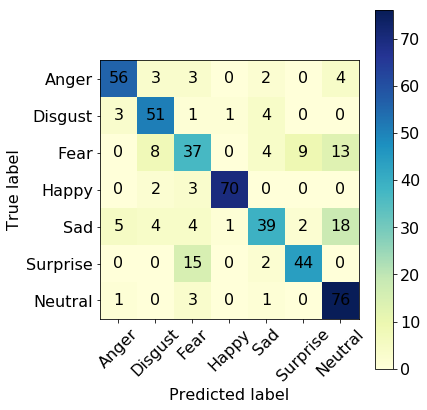

In [72]:
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)
plt.show()